In [164]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
import seaborn as sns

In [165]:
# Einlesen der Daten
didok = pd.read_csv("Data/didok.csv", sep=";")
wege_freizeit_erweitert = pd.read_csv(
    "generated_data/wege_freizeit_erweitert.csv", sep=";"
)
etappen_freizeit_erweitert = pd.read_csv(
    "generated_data/etappen_freizeit_erweitert.csv", sep=";"
)

In [166]:
didok.head()

,lod,Geoposition,﻿numberShort,uicCountryCode,sloid,number,validFrom,validTo,designationOfficial,designationLong,...,businessOrganisation,businessOrganisationNumber,businessOrganisationAbbreviationDe,businessOrganisationAbbreviationFr,businessOrganisationDescriptionDe,businessOrganisationDescriptionFr,fotComment,height,creationDate,editionDate
0,http://lod.opentransportdata.swiss/didok/bpuic,"49.57723600979744, 10.588775009219152",10507,11,ch:1:sloid:1110507,1110507,2022-12-11,2099-12-31,"Neustadt (Aisch), Bahnhof",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-04-25T22:59:46+02:00,2023-10-11T16:56:52+02:00
1,http://lod.opentransportdata.swiss/didok/bpuic,"52.281669008914854, 10.576396007454766",10577,11,ch:1:sloid:1110577,1110577,2022-12-11,2099-12-31,"Braunschweig, Petzvalstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:32:35+02:00,2023-10-11T16:56:52+02:00
2,http://lod.opentransportdata.swiss/didok/bpuic,"50.37017301038644, 8.468945007169054",10563,11,ch:1:sloid:1110563,1110563,2022-12-11,2099-12-31,"Hundstadt, Ortsmitte",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:06:35+02:00,2023-10-11T16:56:52+02:00
3,http://lod.opentransportdata.swiss/didok/bpuic,"48.71780001021133, 9.402911008637096",10564,11,ch:1:sloid:1110564,1110564,2022-12-11,2099-12-31,"Plochingen, Werk",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-01T17:09:30+02:00,2023-10-11T16:56:52+02:00
4,http://lod.opentransportdata.swiss/didok/bpuic,"48.20742701066016, 7.683645007305404",10581,11,ch:1:sloid:1110581,1110581,2023-06-06,2099-12-31,"Weisweil (Brsg), Mühlenstrasse",NaN,...,ch:1:sboid:101257,9988,INFOPLUS,INFOPLUS,Fiktive GO für Infoplus,Fiktive GO für Infoplus,NaN,0.0,2023-06-06T10:36:16+02:00,2023-10-11T16:56:52+02:00


In [167]:
wege_freizeit_erweitert.head()

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y
0,110001,4,3.973,512.210270,Auto,4,Auto,8,3.973,6.559870,...,46.549366,Bussigny,1030,Vaud,True,True,6.559870,46.549366,6.552598,46.568205
1,110001,6,0.404,52.084810,Auto,6,Auto,8,0.404,6.554009,...,46.549366,Bussigny,1030,Vaud,True,True,6.554009,46.540095,6.554009,46.540095
2,110001,7,1.932,249.078843,Auto,7,Auto,11,1.932,6.554009,...,46.549366,Bussigny,1030,Vaud,True,True,6.554009,46.540095,6.559870,46.549366
3,110008,1,5.778,0.000000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591
4,110008,4,3.262,0.000000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591


In [168]:
etappen_freizeit_erweitert.head()

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
2,110001,7,7,Auto,1.932,6.554009,46.540095,6.559870,46.549366,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
3,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
4,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True


In [169]:
# didok DataFrame vorbereiten
didok = didok.dropna(subset=["Geoposition"])
didok["Latitude"], didok["Longitude"] = zip(
    *didok["Geoposition"].str.split(",").apply(lambda x: (float(x[0]), float(x[1])))
)

In [170]:
# Haversine-Distanz (in Kilometern)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius der Erde in Kilometern
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Ergebnis in Kilometern

In [171]:
# Koordinaten aus 'didok'
didok_coords = np.radians(didok[["Latitude", "Longitude"]].values)

# Tree erstellen
tree = cKDTree(didok_coords)

# Koordinaten aus 'wege_freizeit_erweitert'
wege_coords_start = np.radians(wege_freizeit_erweitert[["Start_Y", "Start_X"]].values)
wege_coords_ziel = np.radians(wege_freizeit_erweitert[["Ziel_Y", "Ziel_X"]].values)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(wege_coords_start, k=1)
distances_ziel, indices = tree.query(wege_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
wege_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [172]:
wege_freizeit_erweitert

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,3.973,512.210270,Auto,4,Auto,8,3.973,6.559870,...,1030,Vaud,True,True,6.559870,46.549366,6.552598,46.568205,0.327631,0.320073
1,110001,6,0.404,52.084810,Auto,6,Auto,8,0.404,6.554009,...,1030,Vaud,True,True,6.554009,46.540095,6.554009,46.540095,0.188274,0.188274
2,110001,7,1.932,249.078843,Auto,7,Auto,11,1.932,6.554009,...,1030,Vaud,True,True,6.554009,46.540095,6.559870,46.549366,0.188274,0.327631
3,110008,1,5.778,0.000000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703
4,110008,4,3.262,0.000000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591,0.162703,0.162703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55746,459971,1,14.000,0.000000,Zu Fuss,1,Zu Fuss,8,14.000,7.294728,...,1110,Vaud,True,False,7.294728,46.183483,7.294728,46.183483,0.041724,0.041724
55747,459976,3,1.852,387.917463,Auto,5,Auto,8,1.852,7.577385,...,8207,Schaffhausen,True,False,7.577385,47.560109,7.573720,47.554275,0.022046,0.276308
55748,459981,2,0.067,0.000000,Zu Fuss,4,Zu Fuss,8,0.067,9.025833,...,6825,Ticino,True,True,9.025833,46.193579,9.026348,46.193224,0.098310,0.166477
55749,459981,7,22.757,2866.985148,"Auto, Zu Fuss",11,Auto,8,22.238,8.980385,...,6825,Ticino,True,True,8.980385,45.904131,8.964244,46.027417,0.115728,0.077634


Feststellung: Bei Wegen ist der Start- und Zielort oft identisch. Es ist sinnvoller, die Etappen anzuschauen.

In [173]:
# Koordinaten aus 'etappen_freizeit_erweitert'
etappen_coords_start = np.radians(
    etappen_freizeit_erweitert[["Start_Y", "Start_X"]].values
)
etappen_coords_ziel = np.radians(
    etappen_freizeit_erweitert[["Ziel_Y", "Ziel_X"]].values
)

# Nächste Nachbarn finden (Index und Distanz in Radiant)
distances_start, indices = tree.query(etappen_coords_start, k=1)
distances_ziel, indices = tree.query(etappen_coords_ziel, k=1)

# Distanz in Kilometer umrechnen
distances_km_start = distances_start * 6371  # Erdradius in Kilometern
distances_km_ziel = distances_ziel * 6371  # Erdradius in Kilometern

# Ergebnis hinzufügen
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] = distances_km_start
etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] = distances_km_ziel

In [174]:
etappen_freizeit_erweitert

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Distanz_zur_Haltestelle_km_Start,Distanz_zur_Haltestelle_km_Ziel
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,128.922796,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.327631,0.320073
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,128.922796,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.188274,0.188274
2,110001,7,7,Auto,1.932,6.554009,46.540095,6.559870,46.549366,128.922796,...,3,6.559870,46.549366,Bussigny,1030,Vaud,True,True,0.188274,0.327631
3,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
4,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,0.162703,0.162703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71467,459981,4,2,Zu Fuss,0.067,9.025833,46.193579,9.026348,46.193224,0.000000,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.098310,0.166477
71468,459981,11,7,Auto,22.238,8.980385,45.904131,8.967822,46.027943,128.922796,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.115728,0.077634
71469,459981,12,7,Zu Fuss,0.519,8.967822,46.027943,8.964244,46.027417,0.000000,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.077634,0.277148
71470,459981,13,8,Zu Fuss,0.519,8.964244,46.027417,8.967822,46.027943,0.000000,...,3,8.980385,45.904131,Capolago,6825,Ticino,True,True,0.277148,0.077634


In [175]:
# Prüfen, ob ÖV-Potenzial besteht
etappen_freizeit_erweitert["öv_potenzial"] = (
    (etappen_freizeit_erweitert["Verkehrsmittel"] == "Auto")
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Start"] <= 0.2)
    & (etappen_freizeit_erweitert["Distanz_zur_Haltestelle_km_Ziel"] <= 0.2)
)

# Neue Spalte mit den neuen Emissionen
etappen_freizeit_erweitert["neue_emissionen"] = etappen_freizeit_erweitert.apply(
    lambda row: (
        row["Distanz_km"] * 25.4 if row["öv_potenzial"] else row["Emissionen"]
    ),  # Emissionen 25,4g CO2 pro km gemäss Umweltrechner Verkehr
    axis=1,
)

In [176]:
summe_alt = etappen_freizeit_erweitert["Emissionen"].sum()
summe_neu = etappen_freizeit_erweitert["neue_emissionen"].sum()
einsparung = summe_alt - summe_neu

print("Emissionen vorher: ", summe_alt)
print("Emissionen nachher: ", summe_neu)
print("Einsparung: ", einsparung)

Emissionen vorher:  95856255.81528924
Emissionen nachher:  75143137.08660424
Einsparung:  20713118.728685006


C:\Users\larim\AppData\Local\Temp\ipykernel_5608\2936737430.py:19: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
c:\Users\larim\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


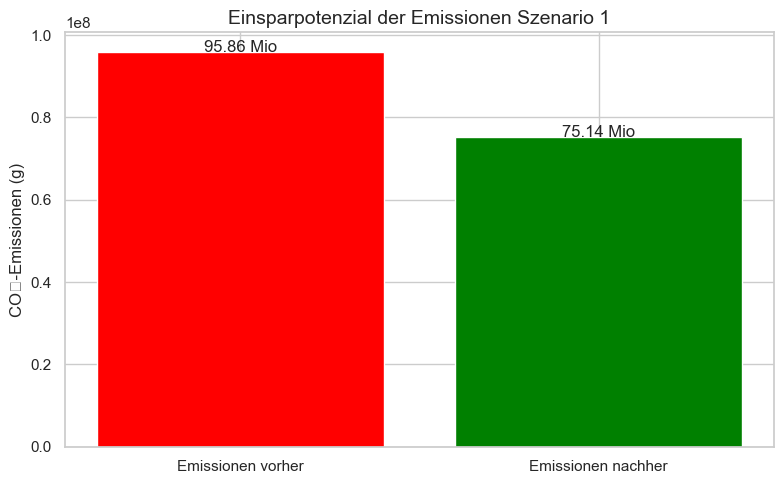

In [216]:
import matplotlib.pyplot as plt

# Daten für das Diagramm
labels = ["Emissionen vorher", "Emissionen nachher"]
values = [summe_alt, summe_neu]
colors = ["red", "green", "blue"]

# Balkendiagramm erstellen
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.ylabel("CO₂-Emissionen (g)", fontsize=12)
plt.title("Einsparpotenzial der Emissionen Szenario 1", fontsize=14)

# Werte anzeigen
for i, value in enumerate(values):
    value_million = value / 1_000_000  # Wert in Millionen umrechnen
    plt.text(i, value + 200, f"{value_million:.2f} Mio", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

In [178]:
# Gruppierung nach HHNR, Wegnummer und Wohnort: Kanton
grouped = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer", "Wohnort: Kanton"])
    .sum(numeric_only=True)
    .reset_index()
)

# Durchschnittliche Emissionen pro Kanton berechnen
avg_emissions_per_canton = (
    grouped.groupby("Wohnort: Kanton")[["Emissionen", "neue_emissionen"]]
    .sum()
    .reset_index()
)

# Berechnung der Einsparung in % je Kanton
avg_emissions_per_canton["Einsparung (%)"] = (
    (
        avg_emissions_per_canton["Emissionen"]
        - avg_emissions_per_canton["neue_emissionen"]
    )
    / avg_emissions_per_canton["Emissionen"]
    * 100
)

print("Durchschnittliche Emissionen und Einsparungen pro Kanton:")
print(avg_emissions_per_canton)

Durchschnittliche Emissionen und Einsparungen pro Kanton:
           Wohnort: Kanton    Emissionen  neue_emissionen  Einsparung (%)
0                   Aargau  6.788395e+06     5.188352e+06       23.570273
1   Appenzell Ausserrhoden  3.973488e+05     3.473123e+05       12.592576
2    Appenzell Innerrhoden  3.617939e+04     2.846503e+04       21.322524
3               Basel-Land  3.933956e+06     3.534325e+06       10.158511
4              Basel-Stadt  7.945142e+05     5.456559e+05       31.322075
5                     Bern  8.885021e+06     6.894934e+06       22.398226
6                 Fribourg  4.601840e+06     3.505253e+06       23.829324
7                   Genève  6.426509e+06     5.108233e+06       20.513104
8                   Glarus  3.079171e+05     2.303825e+05       25.180345
9               Graubünden  2.542962e+06     1.838231e+06       27.713005
10                    Jura  1.394361e+06     1.139337e+06       18.289669
11                  Luzern  4.841124e+06     3.842169e

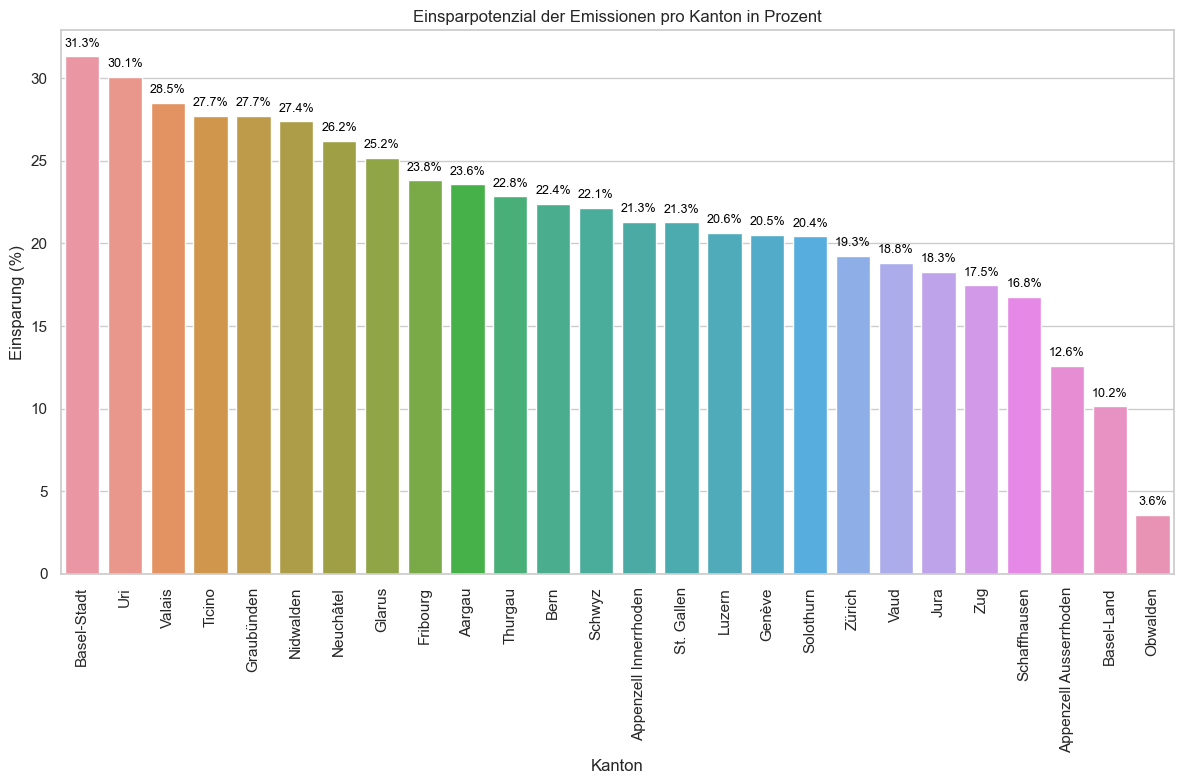

In [ ]:
# Sortiere die Daten nach Einsparung (%) aufsteigend
avg_emissions_per_canton = avg_emissions_per_canton.sort_values(
    "Einsparung (%)", ascending=False
)

# Erstellen des Barplots mit Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Wohnort: Kanton", y="Einsparung (%)", data=avg_emissions_per_canton)

# Beschriftungen und Titel
plt.xlabel("Kanton")
plt.ylabel("Einsparung (%)")
plt.title("Einsparpotenzial der Emissionen pro Kanton in Prozent")
plt.xticks(rotation=90)

# Werte auf den Balken anzeigen
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",  # Anzeige der Einsparung mit einer Dezimalstelle
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=9,
        color="black",
        xytext=(0, 9),  # Positionierung über dem Balken
        textcoords="offset points",
    )

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

In [180]:
# Etappen nach HHNR und Wegnummer gruppieren und nur die Summe der Spalte "neue_emissionen" berechnen
grouped = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer"])[
        "neue_emissionen"
    ]  # Gruppiere nach HHNR und Wegnummer, nur "neue_emissionen"
    .sum()  # Summiere die "neue_emissionen"
    .reset_index()  # Setze den Index zurück
)

In [181]:
# Merge von grouped mit wege_freizeit_erweitert['Emissionen', 'Zweck']
grouped = grouped.merge(
    wege_freizeit_erweitert[
        [
            "HHNR",
            "Wegnummer",
            "Emissionen",
            "Freizeitaktivität",
            "Wohnort X-Koordinate",
            "Wohnort Y-Koordinate",
        ]
    ],
    on=["HHNR", "Wegnummer"],
)

In [182]:
# Fehlende Werte auffüllen
grouped = grouped.fillna("Andere")

In [183]:
grouped

,HHNR,Wegnummer,neue_emissionen,Emissionen,Freizeitaktivität,Wohnort X-Koordinate,Wohnort Y-Koordinate
0,110001,4,512.210270,512.210270,Gastronomiebesuch,6.559870,46.549366
1,110001,6,10.261600,52.084810,Einkaufsbummel / Shopping,6.559870,46.549366
2,110001,7,249.078843,249.078843,Andere,6.559870,46.549366
3,110008,1,0.000000,0.000000,Nicht-sportliche Aussenaktivität,6.635652,46.785591
4,110008,4,0.000000,0.000000,Aktiver Sport,6.635652,46.785591
...,...,...,...,...,...,...,...
55746,459971,1,0.000000,0.000000,Wanderung,6.487331,46.515562
55747,459976,3,387.917463,387.917463,Gastronomiebesuch,8.657034,47.721191
55748,459981,2,0.000000,0.000000,Medizin/Wellness/Fitness,8.980385,45.904131
55749,459981,7,564.845200,2866.985148,Passiver Sport,8.980385,45.904131


In [184]:
# Durchschnitt je Freizeitaktivität berechnen
avg_emissions_per_activity = grouped.groupby("Freizeitaktivität", as_index=False).agg(
    {"Emissionen": "sum", "neue_emissionen": "sum"}
)

# Einsparung in % berechnen
avg_emissions_per_activity["Einsparung (%)"] = (
    (
        avg_emissions_per_activity["Emissionen"]
        - avg_emissions_per_activity["neue_emissionen"]
    )
    / avg_emissions_per_activity["Emissionen"]
    * 100
)

avg_emissions_per_activity

,Freizeitaktivität,Emissionen,neue_emissionen,Einsparung (%)
0,Aktiver Sport,5.678251e+06,4.360281e+06,23.210833
1,Andere,4.541032e+07,3.638207e+07,19.881504
2,"Ausflug, Ferien",4.369768e+06,3.762960e+06,13.886512
3,Besuche,1.728388e+07,1.335985e+07,22.703415
4,Einkaufsbummel / Shopping,8.633370e+05,5.809426e+05,32.709640
5,Essen ohne Gastronomiebesuch,4.587523e+05,3.976310e+05,13.323380
6,Gastronomiebesuch,7.060540e+06,5.377898e+06,23.831629
7,Häusliche Freizeitaktivitäten auswärts,2.994315e+05,2.320251e+05,22.511472
8,"Kulturveranstaltungen, Freizeitanlagen",2.527333e+06,1.828272e+06,27.660041
9,Medizin/Wellness/Fitness,4.655438e+05,3.023263e+05,35.059540


In [185]:
avg_emissions_per_activity["neue_emissionen"].sum() == avg_emissions_per_canton[
    "neue_emissionen"
].sum()

True

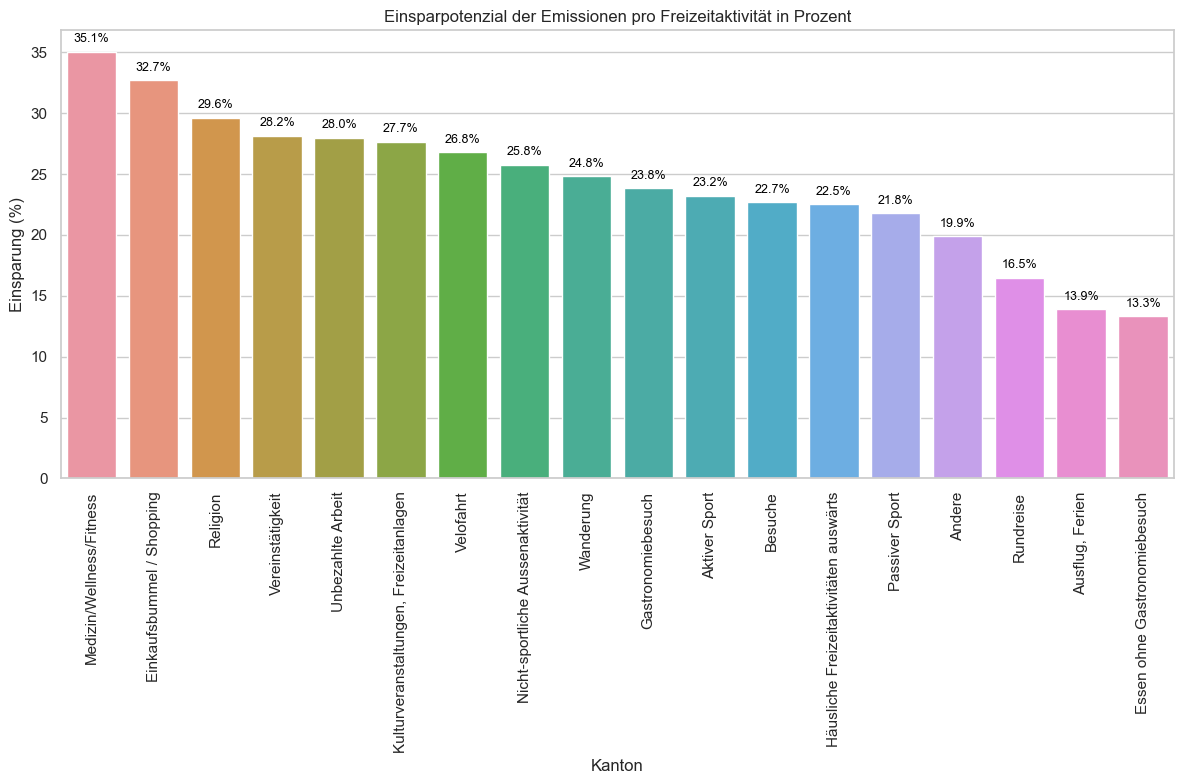

In [ ]:
# Sortiere die Daten nach Einsparung (%) aufsteigend
avg_emissions_per_activity = avg_emissions_per_activity.sort_values(
    "Einsparung (%)", ascending=False
)

# Erstellen des Barplots mit Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x="Freizeitaktivität", y="Einsparung (%)", data=avg_emissions_per_activity
)

# Beschriftungen und Titel
plt.xlabel("Kanton")
plt.ylabel("Einsparung (%)")
plt.title("Einsparpotenzial der Emissionen pro Freizeitaktivität in Prozent")
plt.xticks(rotation=90)

# Werte auf den Balken anzeigen
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",  # Anzeige der Einsparung mit einer Dezimalstelle
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=9,
        color="black",
        xytext=(0, 9),  # Positionierung über dem Balken
        textcoords="offset points",
    )

# Layout anpassen und Plot anzeigen
plt.tight_layout()
plt.show()

### Regressionsanalyse anhand Typologie

In [187]:
# Einlesen GeoPackage
path_to_gpkg = "Data/gemeindetypen_2056.gpkg"  # Pfad zur Datei
layer_name = "ARE_GemTyp00_9"  # Layer-Name aus dem GeoPackage
new_gpkg_data = gpd.read_file(path_to_gpkg, layer=layer_name)

In [195]:
# Wohnort-Koordinaten in Geometrie umwandeln
grouped["geometry"] = gpd.points_from_xy(
    grouped["Wohnort X-Koordinate"],
    grouped["Wohnort Y-Koordinate"],
)

# GeoDataFrame erstellen
wege_freizeit_erweitert_geo = gpd.GeoDataFrame(grouped, geometry="geometry")

# CRS setzen (falls Koordinaten WGS84 sind)
wege_freizeit_erweitert_geo = wege_freizeit_erweitert_geo.set_crs("EPSG:4326")  # WGS84

# Transformiere die Wohnort-Daten ins Koordinatensystem des GeoPackage-Datensatzes
wege_freizeit_erweitert_geo = wege_freizeit_erweitert_geo.to_crs(new_gpkg_data.crs)

In [196]:
# Räumlicher Join
result = gpd.sjoin(
    wege_freizeit_erweitert_geo, new_gpkg_data, how="left", predicate="within"
)

# "NAME"-Spalte hinzufügen
wege_freizeit_erweitert_geo["Typologie"] = result["NAME"]

In [197]:
wege_freizeit_erweitert_geo

,HHNR,Wegnummer,neue_emissionen,Emissionen,Freizeitaktivität,Wohnort X-Koordinate,Wohnort Y-Koordinate,geometry,Typologie
0,110001,4,512.210270,512.210270,Gastronomiebesuch,6.559870,46.549366,POINT (2532603.686 1155720.523),Gürtel der Grosszentren
1,110001,6,10.261600,52.084810,Einkaufsbummel / Shopping,6.559870,46.549366,POINT (2532603.686 1155720.523),Gürtel der Grosszentren
2,110001,7,249.078843,249.078843,Andere,6.559870,46.549366,POINT (2532603.686 1155720.523),Gürtel der Grosszentren
3,110008,1,0.000000,0.000000,Nicht-sportliche Aussenaktivität,6.635652,46.785591,POINT (2538684.747 1181917.182),Mittelzentren
4,110008,4,0.000000,0.000000,Aktiver Sport,6.635652,46.785591,POINT (2538684.747 1181917.182),Mittelzentren
...,...,...,...,...,...,...,...,...,...
55746,459971,1,0.000000,0.000000,Wanderung,6.487331,46.515562,POINT (2526994.977 1152028.050),Nebenzentren der Grosszentren
55747,459976,3,387.917463,387.917463,Gastronomiebesuch,8.657034,47.721191,POINT (2691418.775 1286331.078),Mittelzentren
55748,459981,2,0.000000,0.000000,Medizin/Wellness/Fitness,8.980385,45.904131,POINT (2719646.954 1084788.966),Mittelzentren
55749,459981,7,564.845200,2866.985148,Passiver Sport,8.980385,45.904131,POINT (2719646.954 1084788.966),Mittelzentren


In [198]:
wege_freizeit_erweitert_geo["Typologie"].value_counts()

Gürtel der Mittelzentren          12167
Mittelzentren                     11163
Gürtel der Grosszentren            8505
Grosszentren                       7063
Periurbane ländliche Gemeinden     6696
Nebenzentren der Grosszentren      4648
Agrargemeinden                     3418
Kleinzentren                       1210
Touristische Gemeinden              881
Name: Typologie, dtype: int64

In [199]:
# Referenzkategorie definieren
reference_category = "Grosszentren"

# Dummy-Variablen erstellen
dummy_data = pd.get_dummies(wege_freizeit_erweitert_geo["Typologie"], drop_first=False)

# Referenzkategorie entfernen
dummy_data = dummy_data.drop(columns=[reference_category])

In [202]:
# Zielvariable und Prädiktoren definieren
X = dummy_data  # Dummy-Variablen außer der Referenz
y = wege_freizeit_erweitert_geo["neue_emissionen"]

# Konstanten-Term hinzufügen (Intercept)
X = sm.add_constant(X)

# Regression durchführen
model = sm.OLS(y, X).fit()

# Ergebnisse anzeigen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        neue_emissionen   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.416
Date:                Sat, 14 Dec 2024   Prob (F-statistic):             0.0132
Time:                        18:14:52   Log-Likelihood:            -6.0159e+05
No. Observations:               55751   AIC:                         1.203e+06
Df Residuals:                   55742   BIC:                         1.203e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

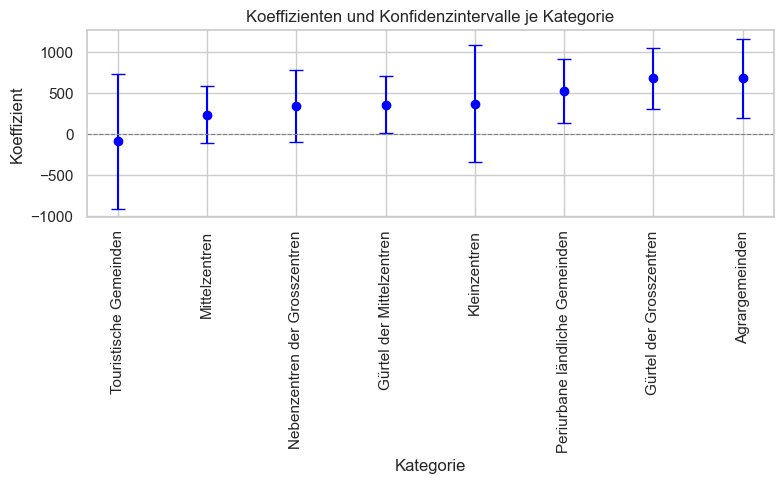

In [203]:
# Koeffizienten und Konfidenzintervalle extrahieren
coefficients = model.params
conf_int = model.conf_int()
conf_int.columns = ["lower", "upper"]

# Daten vorbereiten
coef_df = pd.DataFrame(
    {
        "category": coefficients.index,
        "coefficient": coefficients.values,
        "lower": conf_int["lower"].values,
        "upper": conf_int["upper"].values,
    }
)

# Nur Dummy-Variablen plotten (ohne den Intercept)
coef_df = coef_df[coef_df["category"] != "const"]

# Sortiere nach Koeffizienten aufsteigend
coef_df = coef_df.sort_values("coefficient")

# Plot erstellen
plt.figure(figsize=(8, 5))
plt.errorbar(
    coef_df["category"],
    coef_df["coefficient"],
    yerr=[
        coef_df["coefficient"] - coef_df["lower"],
        coef_df["upper"] - coef_df["coefficient"],
    ],
    fmt="o",
    capsize=5,
    color="blue",
    label="Koeffizienten mit Konfidenzintervallen",
)

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Null-Linie
plt.xticks(rotation=90)
plt.xlabel("Kategorie")
plt.ylabel("Koeffizient")
plt.title("Koeffizienten und Konfidenzintervalle je Kategorie")
plt.tight_layout()
plt.show()

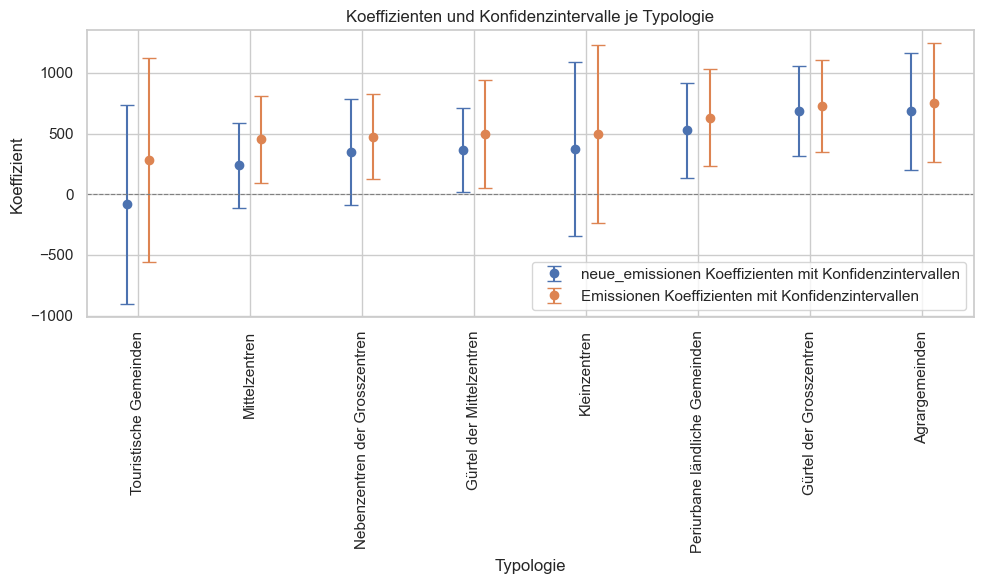

In [211]:
# Zielvariable und Prädiktoren für das erste Modell (neue_emissionen)
y1 = wege_freizeit_erweitert_geo["neue_emissionen"]
X1 = dummy_data  # Dummy-Variablen außer der Referenz
X1 = sm.add_constant(X1)  # Konstanten-Term hinzufügen

# Regression für neue_emissionen
model1 = sm.OLS(y1, X1).fit()

# Zielvariable und Prädiktoren für das zweite Modell (Emissionen)
y2 = wege_freizeit_erweitert_geo["Emissionen"]
X2 = dummy_data  # Dummy-Variablen außer der Referenz
X2 = sm.add_constant(X2)  # Konstanten-Term hinzufügen

# Regression für Emissionen
model2 = sm.OLS(y2, X2).fit()

# Koeffizienten und Konfidenzintervalle für beide Modelle extrahieren
coefficients1 = model1.params
conf_int1 = model1.conf_int()
conf_int1.columns = ["lower", "upper"]

coefficients2 = model2.params
conf_int2 = model2.conf_int()
conf_int2.columns = ["lower", "upper"]

# Daten für die Darstellung vorbereiten
coef_df1 = pd.DataFrame(
    {
        "category": coefficients1.index,
        "coefficient": coefficients1.values,
        "lower": conf_int1["lower"].values,
        "upper": conf_int1["upper"].values,
        "model": "neue_emissionen",  # Modellbezeichnung hinzufügen
    }
)

coef_df2 = pd.DataFrame(
    {
        "category": coefficients2.index,
        "coefficient": coefficients2.values,
        "lower": conf_int2["lower"].values,
        "upper": conf_int2["upper"].values,
        "model": "Emissionen",  # Modellbezeichnung hinzufügen
    }
)

# Beide DataFrames zusammenführen
coef_df = pd.concat([coef_df1, coef_df2])

# Nur Dummy-Variablen plotten (ohne den Intercept)
coef_df = coef_df[coef_df["category"] != "const"]

# Sortiere nach Koeffizienten aufsteigend
coef_df = coef_df.sort_values("coefficient")

# Plot erstellen
plt.figure(figsize=(10, 6))

# Setze eine Verschiebung, damit die Barplots nebeneinander erscheinen
offset = 0.2  # Verschiebung für das zweite Modell

# Für jedes Modell einen separaten Plot erstellen, nebeneinander
for i, model_name in enumerate(coef_df["model"].unique()):
    model_data = coef_df[coef_df["model"] == model_name]

    # Verschiebung der x-Position basierend auf dem Modell
    positions = range(len(model_data))
    positions = [pos + i * offset for pos in positions]

    # Fehlerbalken für jedes Modell plotten
    plt.errorbar(
        positions,
        model_data["coefficient"],
        yerr=[
            model_data["coefficient"] - model_data["lower"],
            model_data["upper"] - model_data["coefficient"],
        ],
        fmt="o",
        capsize=5,
        label=f"{model_name} Koeffizienten mit Konfidenzintervallen",
    )

# Null-Linie hinzufügen
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)

# X-Achse auf die mittleren Positionen setzen
xticks = [pos + offset / 2 for pos in range(len(coef_df["category"].unique()))]
plt.xticks(xticks, coef_df["category"].unique(), rotation=90)

plt.xlabel("Typologie")
plt.ylabel("Koeffizient")
plt.title("Koeffizienten und Konfidenzintervalle je Typologie")
plt.legend()
plt.tight_layout()
plt.show()

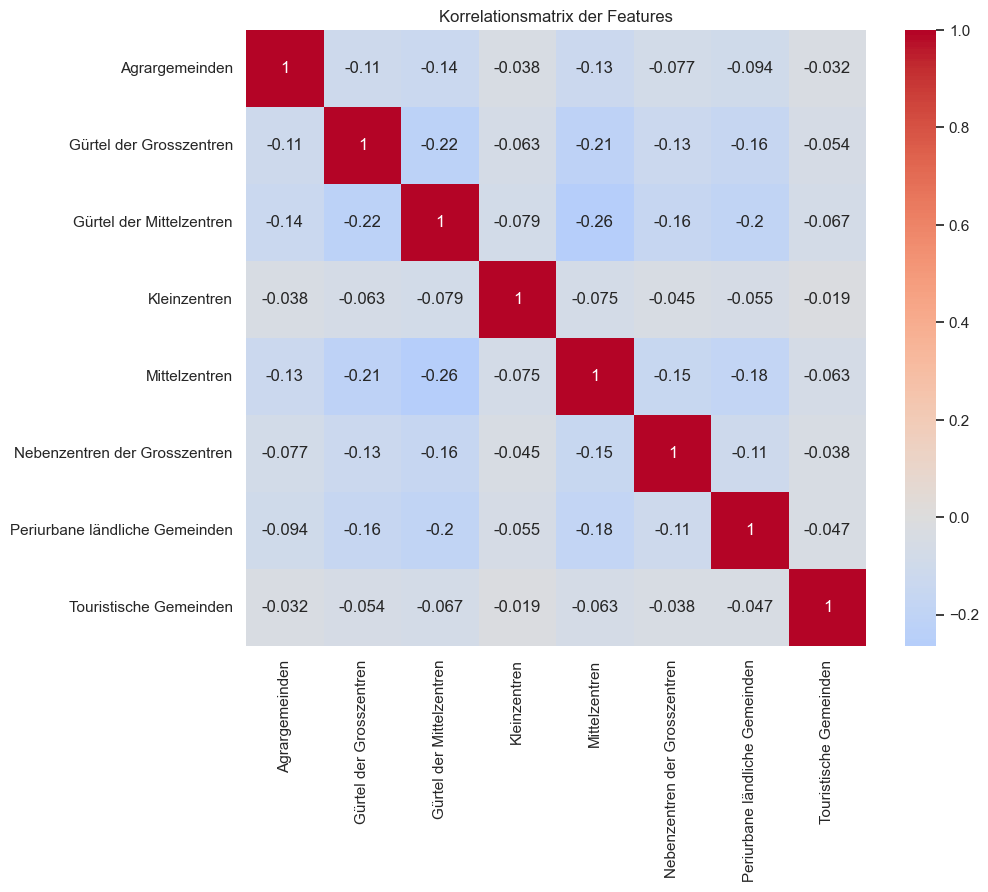

In [ ]:
# Korrelationsmatrix zwischen den Features im DataFrame
correlation_matrix = dummy_data.corr()

# Korrelationsmatrix plotten
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix der Features")
plt.show()